In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Internet-Demographic.csv')

In [3]:
df

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
df.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [6]:
df.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

In [7]:
df.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [8]:
birthrate = df['Birth rate'].value_counts()
birthrate 

Birth rate
10.200    5
9.200     4
12.500    3
8.500     3
9.400     2
         ..
32.947    1
20.850    1
42.394    1
40.471    1
35.715    1
Name: count, Length: 177, dtype: int64

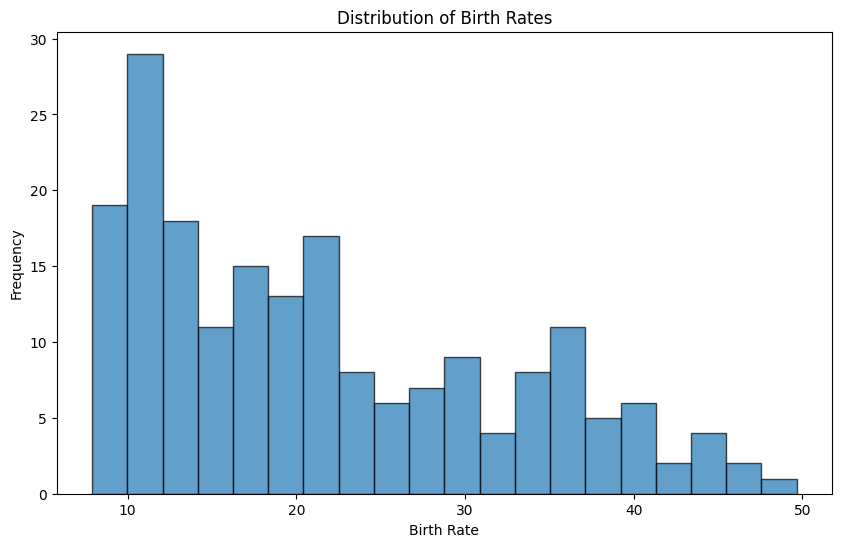

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Birth rate'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Birth Rate")
plt.ylabel("Frequency") 
plt.title("Distribution of Birth Rates") 
plt.show()

<h1>1. DISTRIBUTION OF BIRTH RATE</h1>

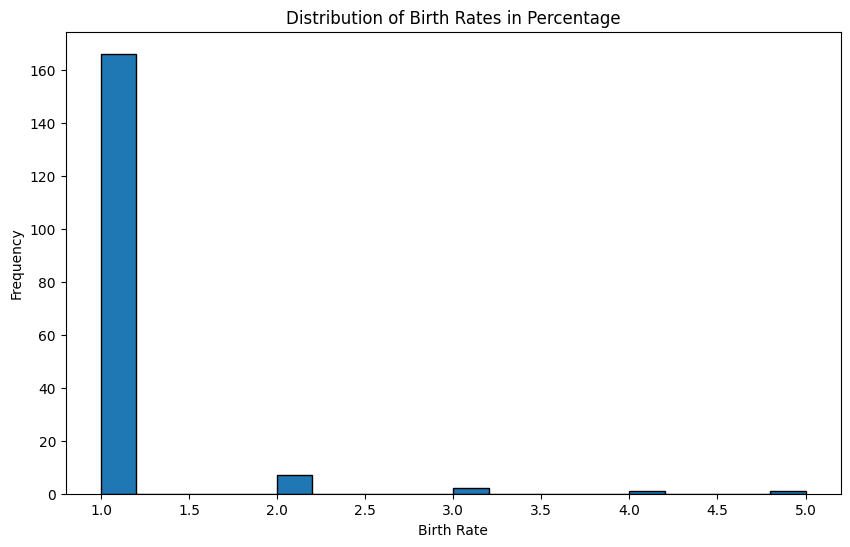

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(birthrate, bins=20, edgecolor='black')
plt.xlabel("Birth Rate")
plt.ylabel("Frequency") 
plt.title("Distribution of Birth Rates in Percentage") 
plt.show()

<h1>2.Top 5 Countries with Highest Internet Usage</h1>

In [11]:
top5 = df.nlargest(5, 'Internet users')[['Country Code', 'Internet users']]  
(top5) 


,Country Code,Internet users
84,ISL,96.5468
22,BMU,95.3000
131,NOR,95.0534
163,SWE,94.7836
47,DNK,94.6297


<h1>3. Count of Countries by Income Group</h1>

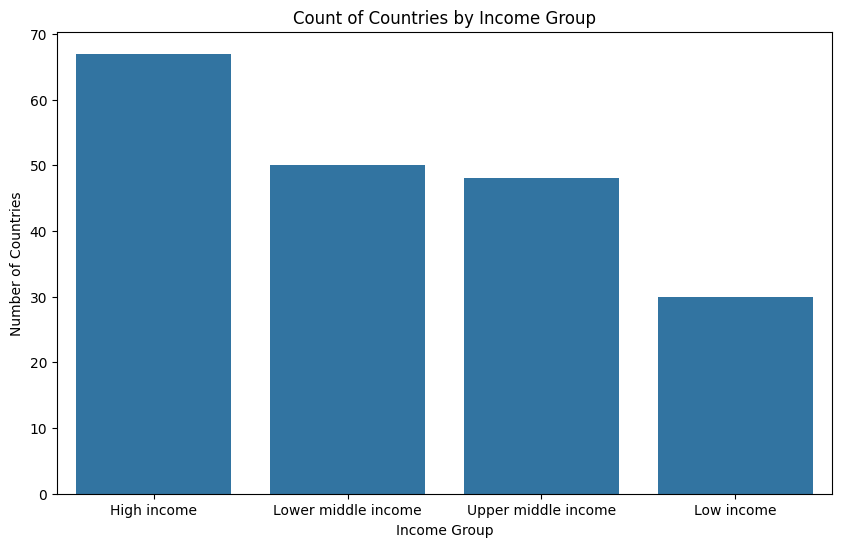

In [12]:
income_counts = df['Income Group'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.xlabel("Income Group")
plt.ylabel("Number of Countries")
plt.title("Count of Countries by Income Group")
plt.show()

<h1>4. Box Plot of Internet Usage
</h1>

<h1>5. Countries with no Internet Access</h1>

In [13]:
no_internet = df[df['Internet users'] == 0][['Country Code']]
(no_internet)

,Country Code


<h1>6. Average Birth Rate</h1>

In [14]:
avg_birth_rate = df['Birth rate'].mean()
(avg_birth_rate)

np.float64(21.469928205128202)

<h1>7. Scatter Plot: Birth Rate VS. Internet Usage</h1>

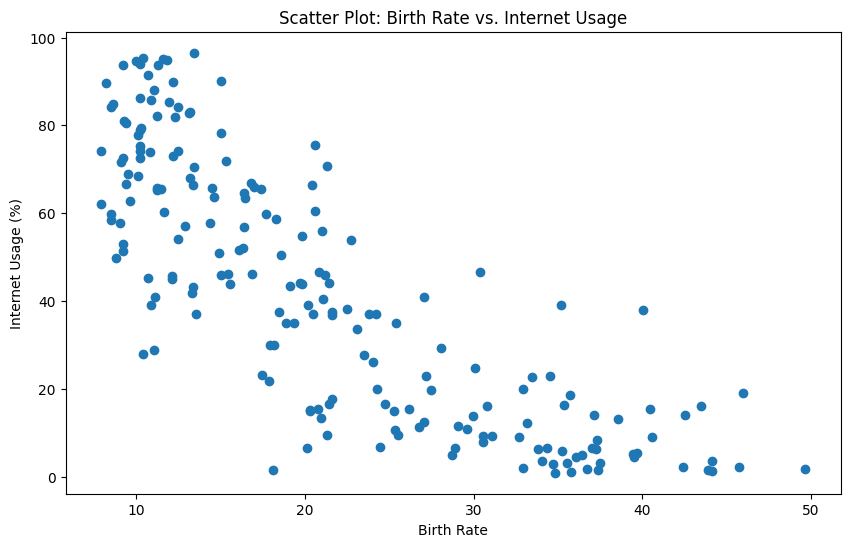

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Birth rate'], df['Internet users'])
plt.xlabel("Birth Rate")
plt.ylabel("Internet Usage (%)")
plt.title("Scatter Plot: Birth Rate vs. Internet Usage")
plt.show()

<h1>8. Countries with Birth Rates Above 40</h1>

In [16]:
high_birth_rate = df[df['Birth rate'] > 40][['Country Name', 'Birth rate']]
(high_birth_rate)

,Country Name,Birth rate
2,Angola,45.985
11,Burundi,44.151
14,Burkina Faso,40.551
65,"Gambia, The",42.525
115,Mali,44.138
127,Niger,49.661
128,Nigeria,40.045
156,Somalia,43.891
167,Chad,45.745
178,Uganda,43.474


<h1>9. Pie Chart of Income Groups</h1>

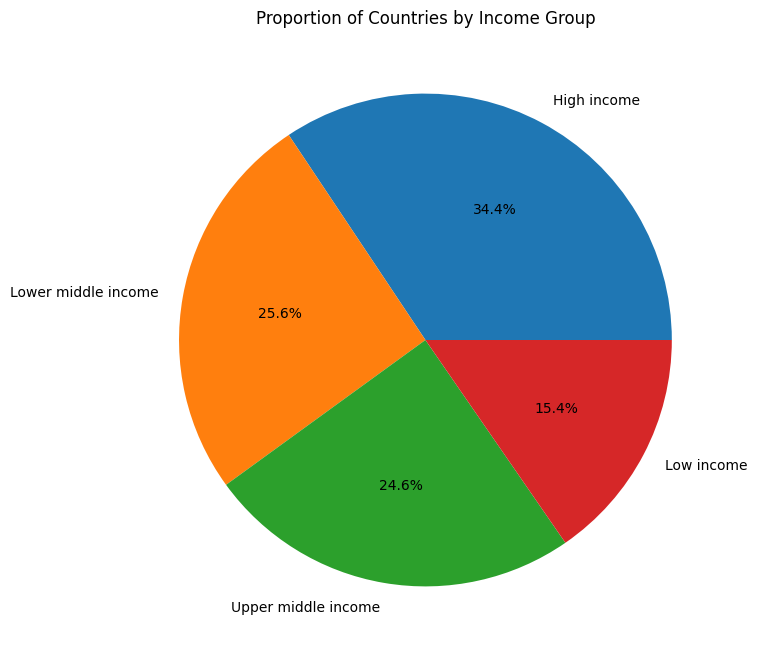

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Countries by Income Group")
plt.show()

<h1>10. Correlation Between Birth Rate and Internet Usage</h1>

In [18]:
corr= df['Birth rate'].corr(df['Internet users'])
(corr)

np.float64(-0.8155885551284763)